In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.king_keltner_strategy import KingKeltnerStrategy
from datetime import datetime

2019-10-26 11:54:27.481404	开始加载历史数据
2019-10-26 11:54:30.174953	加载进度：###### [61%]
2019-10-26 11:54:31.869569	加载进度：########## [100%]
2019-10-26 11:54:31.870569	历史数据加载完成，数据量：68649
2019-10-26 11:54:31.883568	策略初始化完成
2019-10-26 11:54:31.883568	开始回放历史数据
2019-10-26 11:54:33.632122	历史数据回放结束
2019-10-26 11:54:33.632122	开始计算逐日盯市盈亏
2019-10-26 11:54:33.649089	逐日盯市盈亏计算完成
2019-10-26 11:54:33.650089	开始计算策略统计指标
2019-10-26 11:54:33.657114	------------------------------
2019-10-26 11:54:33.657114	首个交易日：	2019-09-02
2019-10-26 11:54:33.657114	最后交易日：	2019-10-20
2019-10-26 11:54:33.657114	总交易日：	49
2019-10-26 11:54:33.657114	盈利交易日：	31
2019-10-26 11:54:33.657114	亏损交易日：	18
2019-10-26 11:54:33.657114	起始资金：	200,000.00
2019-10-26 11:54:33.657114	结束资金：	449,258.82
2019-10-26 11:54:33.657114	总收益率：	124.63%
2019-10-26 11:54:33.657114	年化收益：	610.43%
2019-10-26 11:54:33.657114	最大回撤: 	-21,644.17
2019-10-26 11:54:33.657114	百分比最大回撤: -7.95%
2019-10-26 11:54:33.657114	总盈亏：	249,258.82
2019-10-26 11:54:33.657114	总手续费：	0.00
2019-

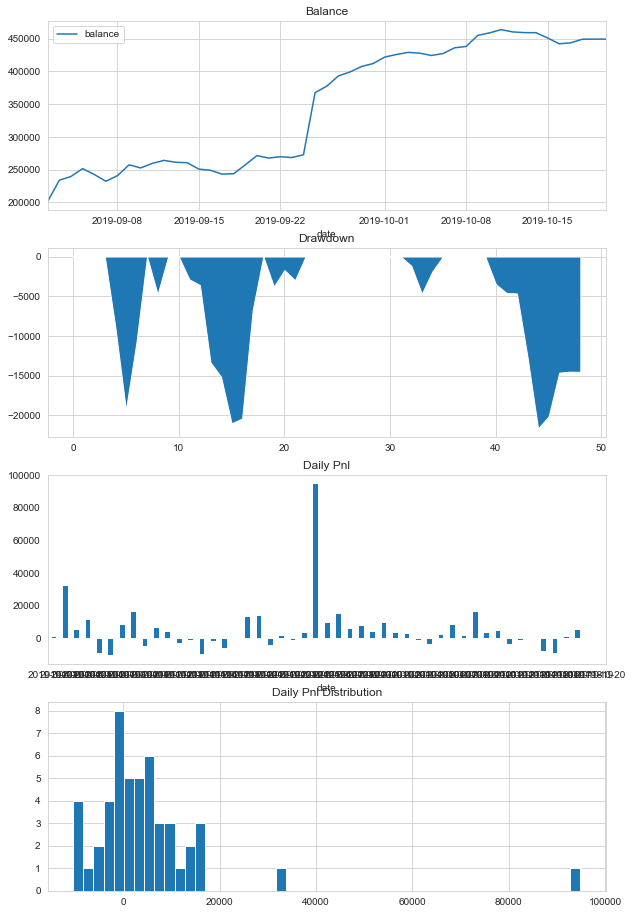

In [6]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BTCUSDT.OKEX",
    interval="1m",
    start=datetime(2019, 9, 1),
    end=datetime(2019, 10, 20),
    rate=0.0,
    slippage=0.0,
    size=1,
    pricetick=0.01,
    capital=200_000,
)

KingKeltnerStrategy.kk_length = 9
KingKeltnerStrategy.kk_dev = 0.1
KingKeltnerStrategy.trailing_percent = 0.2
    
engine.add_strategy(KingKeltnerStrategy, {})

#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics();
engine.show_chart()

In [11]:
setting = OptimizationSetting()
setting.set_target("total_return")

setting.add_parameter("kk_length", 5, 20, 1)
setting.add_parameter("kk_dev", 0.1, 5, 0.1)
setting.add_parameter("trailing_percent", 0.1, 2, 0.1)

engine.run_ga_optimization(setting, population_size=20, ngen_size=500)

2019-10-25 12:21:54.303712	参数优化空间：15200
2019-10-25 12:21:54.303712	每代族群总数：20
2019-10-25 12:21:54.303712	优良筛选个数：16
2019-10-25 12:21:54.303712	迭代次数：500
2019-10-25 12:21:54.303712	交叉概率：95%
2019-10-25 12:21:54.303712	突变概率：5%
2019-10-25 12:21:54.303712	开始加载历史数据
2019-10-25 12:21:54.304711	加载进度：###### [61%]
2019-10-25 12:21:54.305711	加载进度：########## [100%]
2019-10-25 12:21:54.305711	历史数据加载完成，数据量：68650
2019-10-25 12:21:54.319708	策略初始化完成
2019-10-25 12:21:54.319708	开始回放历史数据
2019-10-25 12:21:55.637226	历史数据回放结束
2019-10-25 12:21:55.638227	开始计算逐日盯市盈亏
2019-10-25 12:21:55.642226	逐日盯市盈亏计算完成
2019-10-25 12:21:55.642226	开始计算策略统计指标
2019-10-25 12:21:55.649225	开始加载历史数据
2019-10-25 12:21:55.650228	加载进度：###### [61%]
2019-10-25 12:21:55.651226	加载进度：########## [100%]
2019-10-25 12:21:55.651226	历史数据加载完成，数据量：68650
2019-10-25 12:21:55.664224	策略初始化完成
2019-10-25 12:21:55.664224	开始回放历史数据
2019-10-25 12:21:56.931772	历史数据回放结束
2019-10-25 12:21:56.931772	开始计算逐日盯市盈亏
2019-10-25 12:21:56.934771	逐日盯市盈亏计算完成
2019-10-25 12:21:56.9

2019-10-25 12:22:23.184011	历史数据回放结束
2019-10-25 12:22:23.185014	开始计算逐日盯市盈亏
2019-10-25 12:22:23.188011	逐日盯市盈亏计算完成
2019-10-25 12:22:23.188011	开始计算策略统计指标
2019-10-25 12:22:23.195012	开始加载历史数据
2019-10-25 12:22:23.196444	加载进度：###### [61%]
2019-10-25 12:22:23.197012	加载进度：########## [100%]
2019-10-25 12:22:23.197012	历史数据加载完成，数据量：68650
2019-10-25 12:22:23.209526	策略初始化完成
2019-10-25 12:22:23.209526	开始回放历史数据
2019-10-25 12:22:24.522561	历史数据回放结束
2019-10-25 12:22:24.522561	开始计算逐日盯市盈亏
2019-10-25 12:22:24.526561	逐日盯市盈亏计算完成
2019-10-25 12:22:24.526561	开始计算策略统计指标
2019-10-25 12:22:24.533560	开始加载历史数据
2019-10-25 12:22:24.534528	加载进度：###### [61%]
2019-10-25 12:22:24.534528	加载进度：########## [100%]
2019-10-25 12:22:24.535531	历史数据加载完成，数据量：68650
2019-10-25 12:22:24.549526	策略初始化完成
2019-10-25 12:22:24.549526	开始回放历史数据
2019-10-25 12:22:25.790651	历史数据回放结束
2019-10-25 12:22:25.790651	开始计算逐日盯市盈亏
2019-10-25 12:22:25.793654	逐日盯市盈亏计算完成
2019-10-25 12:22:25.794654	开始计算策略统计指标
2019-10-25 12:22:25.801621	开始加载历史数据
2019-10-25 12:22:2

2019-10-25 12:22:50.844612	历史数据回放结束
2019-10-25 12:22:50.845609	开始计算逐日盯市盈亏
2019-10-25 12:22:50.847615	逐日盯市盈亏计算完成
2019-10-25 12:22:50.847615	开始计算策略统计指标
2019-10-25 12:22:50.855611	开始加载历史数据
2019-10-25 12:22:50.856612	加载进度：###### [61%]
2019-10-25 12:22:50.857612	加载进度：########## [100%]
2019-10-25 12:22:50.857612	历史数据加载完成，数据量：68650
2019-10-25 12:22:50.869611	策略初始化完成
2019-10-25 12:22:50.869611	开始回放历史数据
2019-10-25 12:22:52.108616	历史数据回放结束
2019-10-25 12:22:52.108616	开始计算逐日盯市盈亏
2019-10-25 12:22:52.111615	逐日盯市盈亏计算完成
2019-10-25 12:22:52.111615	开始计算策略统计指标
2019-10-25 12:22:52.119614	开始加载历史数据
2019-10-25 12:22:52.119614	加载进度：###### [61%]
2019-10-25 12:22:52.120617	加载进度：########## [100%]
2019-10-25 12:22:52.120617	历史数据加载完成，数据量：68650
2019-10-25 12:22:52.133613	策略初始化完成
2019-10-25 12:22:52.134617	开始回放历史数据
2019-10-25 12:22:53.649740	历史数据回放结束
2019-10-25 12:22:53.649740	开始计算逐日盯市盈亏
2019-10-25 12:22:53.652738	逐日盯市盈亏计算完成
2019-10-25 12:22:53.652738	开始计算策略统计指标
2019-10-25 12:22:53.659748	开始加载历史数据
2019-10-25 12:22:5

2019-10-25 12:23:20.012731	历史数据回放结束
2019-10-25 12:23:20.012731	开始计算逐日盯市盈亏
2019-10-25 12:23:20.015746	逐日盯市盈亏计算完成
2019-10-25 12:23:20.015746	开始计算策略统计指标
2019-10-25 12:23:20.022734	开始加载历史数据
2019-10-25 12:23:20.023735	加载进度：###### [61%]
2019-10-25 12:23:20.024734	加载进度：########## [100%]
2019-10-25 12:23:20.024734	历史数据加载完成，数据量：68650
2019-10-25 12:23:20.036733	策略初始化完成
2019-10-25 12:23:20.037734	开始回放历史数据
2019-10-25 12:23:21.275247	历史数据回放结束
2019-10-25 12:23:21.276248	开始计算逐日盯市盈亏
2019-10-25 12:23:21.279249	逐日盯市盈亏计算完成
2019-10-25 12:23:21.279249	开始计算策略统计指标
2019-10-25 12:23:21.286248	开始加载历史数据
2019-10-25 12:23:21.287247	加载进度：###### [61%]
2019-10-25 12:23:21.287247	加载进度：########## [100%]
2019-10-25 12:23:21.287247	历史数据加载完成，数据量：68650
2019-10-25 12:23:21.300766	策略初始化完成
2019-10-25 12:23:21.300766	开始回放历史数据
2019-10-25 12:23:22.774352	历史数据回放结束
2019-10-25 12:23:22.774352	开始计算逐日盯市盈亏
2019-10-25 12:23:22.777351	逐日盯市盈亏计算完成
2019-10-25 12:23:22.777351	开始计算策略统计指标
2019-10-25 12:23:22.784318	开始加载历史数据
2019-10-25 12:23:2

2019-10-25 12:23:47.816455	历史数据回放结束
2019-10-25 12:23:47.816455	开始计算逐日盯市盈亏
2019-10-25 12:23:47.820456	逐日盯市盈亏计算完成
2019-10-25 12:23:47.821472	开始计算策略统计指标
11 	20    	[44.742]     	[0.]        	[44.742]	[44.742]
2019-10-25 12:23:47.830453	开始加载历史数据
2019-10-25 12:23:47.831453	加载进度：###### [61%]
2019-10-25 12:23:47.832454	加载进度：########## [100%]
2019-10-25 12:23:47.832454	历史数据加载完成，数据量：68650
2019-10-25 12:23:47.844453	策略初始化完成
2019-10-25 12:23:47.844453	开始回放历史数据
2019-10-25 12:23:49.034422	历史数据回放结束
2019-10-25 12:23:49.035422	开始计算逐日盯市盈亏
2019-10-25 12:23:49.039418	逐日盯市盈亏计算完成
2019-10-25 12:23:49.039418	开始计算策略统计指标
2019-10-25 12:23:49.046451	开始加载历史数据
2019-10-25 12:23:49.048452	加载进度：###### [61%]
2019-10-25 12:23:49.048452	加载进度：########## [100%]
2019-10-25 12:23:49.049452	历史数据加载完成，数据量：68650
2019-10-25 12:23:49.061451	策略初始化完成
2019-10-25 12:23:49.061451	开始回放历史数据
2019-10-25 12:23:50.254041	历史数据回放结束
2019-10-25 12:23:50.254041	开始计算逐日盯市盈亏
2019-10-25 12:23:50.258041	逐日盯市盈亏计算完成
2019-10-25 12:23:50.258041	开始计算策略统计指

2019-10-25 12:24:13.112678	历史数据回放结束
2019-10-25 12:24:13.112678	开始计算逐日盯市盈亏
2019-10-25 12:24:13.115650	逐日盯市盈亏计算完成
2019-10-25 12:24:13.115650	开始计算策略统计指标
2019-10-25 12:24:13.123645	开始加载历史数据
2019-10-25 12:24:13.124643	加载进度：###### [61%]
2019-10-25 12:24:13.125648	加载进度：########## [100%]
2019-10-25 12:24:13.126644	历史数据加载完成，数据量：68650
2019-10-25 12:24:13.138643	策略初始化完成
2019-10-25 12:24:13.138643	开始回放历史数据
2019-10-25 12:24:14.434820	历史数据回放结束
2019-10-25 12:24:14.434820	开始计算逐日盯市盈亏
2019-10-25 12:24:14.437818	逐日盯市盈亏计算完成
2019-10-25 12:24:14.437818	开始计算策略统计指标
25 	20    	[46.3154375] 	[4.16292433]	[44.742]	[57.3295]
2019-10-25 12:24:14.446818	开始加载历史数据
2019-10-25 12:24:14.447818	加载进度：###### [61%]
2019-10-25 12:24:14.448818	加载进度：########## [100%]
2019-10-25 12:24:14.448818	历史数据加载完成，数据量：68650
2019-10-25 12:24:14.461816	策略初始化完成
2019-10-25 12:24:14.461816	开始回放历史数据
2019-10-25 12:24:15.993849	历史数据回放结束
2019-10-25 12:24:15.993849	开始计算逐日盯市盈亏
2019-10-25 12:24:15.996849	逐日盯市盈亏计算完成
2019-10-25 12:24:15.996849	开始计算策略统计

2019-10-25 12:24:40.554789	历史数据回放结束
2019-10-25 12:24:40.554789	开始计算逐日盯市盈亏
2019-10-25 12:24:40.558786	逐日盯市盈亏计算完成
2019-10-25 12:24:40.558786	开始计算策略统计指标
2019-10-25 12:24:40.566755	开始加载历史数据
2019-10-25 12:24:40.567755	加载进度：###### [61%]
2019-10-25 12:24:40.568757	加载进度：########## [100%]
2019-10-25 12:24:40.568757	历史数据加载完成，数据量：68650
2019-10-25 12:24:40.583752	策略初始化完成
2019-10-25 12:24:40.583752	开始回放历史数据
2019-10-25 12:24:41.834271	历史数据回放结束
2019-10-25 12:24:41.835272	开始计算逐日盯市盈亏
2019-10-25 12:24:41.840270	逐日盯市盈亏计算完成
2019-10-25 12:24:41.840270	开始计算策略统计指标
38 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:24:41.850272	开始加载历史数据
2019-10-25 12:24:41.850272	加载进度：###### [61%]
2019-10-25 12:24:41.851273	加载进度：########## [100%]
2019-10-25 12:24:41.851273	历史数据加载完成，数据量：68650
2019-10-25 12:24:41.864271	策略初始化完成
2019-10-25 12:24:41.864271	开始回放历史数据
2019-10-25 12:24:43.060307	历史数据回放结束
2019-10-25 12:24:43.060307	开始计算逐日盯市盈亏
2019-10-25 12:24:43.064274	逐日盯市盈亏计算完成
2019-10-25 12:24:43.064274	开始计算策略统

2019-10-25 12:25:06.233021	历史数据回放结束
2019-10-25 12:25:06.233021	开始计算逐日盯市盈亏
2019-10-25 12:25:06.237022	逐日盯市盈亏计算完成
2019-10-25 12:25:06.237022	开始计算策略统计指标
53 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:25:06.247019	开始加载历史数据
2019-10-25 12:25:06.247019	加载进度：###### [61%]
2019-10-25 12:25:06.248021	加载进度：########## [100%]
2019-10-25 12:25:06.248021	历史数据加载完成，数据量：68650
2019-10-25 12:25:06.262052	策略初始化完成
2019-10-25 12:25:06.262052	开始回放历史数据
2019-10-25 12:25:07.749606	历史数据回放结束
2019-10-25 12:25:07.749606	开始计算逐日盯市盈亏
2019-10-25 12:25:07.752605	逐日盯市盈亏计算完成
2019-10-25 12:25:07.753606	开始计算策略统计指标
2019-10-25 12:25:07.759606	开始加载历史数据
2019-10-25 12:25:07.760606	加载进度：###### [61%]
2019-10-25 12:25:07.762606	加载进度：########## [100%]
2019-10-25 12:25:07.762606	历史数据加载完成，数据量：68650
2019-10-25 12:25:07.775604	策略初始化完成
2019-10-25 12:25:07.775604	开始回放历史数据
2019-10-25 12:25:09.019116	历史数据回放结束
2019-10-25 12:25:09.019116	开始计算逐日盯市盈亏
2019-10-25 12:25:09.022117	逐日盯市盈亏计算完成
2019-10-25 12:25:09.022117	开始计算策略统

2019-10-25 12:25:30.459291	历史数据回放结束
2019-10-25 12:25:30.459291	开始计算逐日盯市盈亏
2019-10-25 12:25:30.462260	逐日盯市盈亏计算完成
2019-10-25 12:25:30.462260	开始计算策略统计指标
74 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:25:30.472293	开始加载历史数据
2019-10-25 12:25:30.472293	加载进度：###### [61%]
2019-10-25 12:25:30.473293	加载进度：########## [100%]
2019-10-25 12:25:30.473293	历史数据加载完成，数据量：68650
2019-10-25 12:25:30.486290	策略初始化完成
2019-10-25 12:25:30.486290	开始回放历史数据
2019-10-25 12:25:31.645289	历史数据回放结束
2019-10-25 12:25:31.646289	开始计算逐日盯市盈亏
2019-10-25 12:25:31.650290	逐日盯市盈亏计算完成
2019-10-25 12:25:31.650290	开始计算策略统计指标
75 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
76 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
77 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:25:31.663290	开始加载历史数据
2019-10-25 12:25:31.664290	加载进度：###### [61%]
2019-10-25 12:25:31.664290	加载进度：########## [100%]
2019-10-25 12:25:31.664290	历史数据加载完成，数据量：68650
2019-10-25 12:25:31.677290	策略初始化完成
2019-10-

2019-10-25 12:25:54.450214	历史数据回放结束
2019-10-25 12:25:54.450214	开始计算逐日盯市盈亏
2019-10-25 12:25:54.453212	逐日盯市盈亏计算完成
2019-10-25 12:25:54.453212	开始计算策略统计指标
92 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
93 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:25:54.465212	开始加载历史数据
2019-10-25 12:25:54.466211	加载进度：###### [61%]
2019-10-25 12:25:54.467212	加载进度：########## [100%]
2019-10-25 12:25:54.467212	历史数据加载完成，数据量：68650
2019-10-25 12:25:54.480210	策略初始化完成
2019-10-25 12:25:54.480210	开始回放历史数据
2019-10-25 12:25:55.664764	历史数据回放结束
2019-10-25 12:25:55.665761	开始计算逐日盯市盈亏
2019-10-25 12:25:55.668761	逐日盯市盈亏计算完成
2019-10-25 12:25:55.668761	开始计算策略统计指标
94 	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:25:55.679761	开始加载历史数据
2019-10-25 12:25:55.680763	加载进度：###### [61%]
2019-10-25 12:25:55.681765	加载进度：########## [100%]
2019-10-25 12:25:55.681765	历史数据加载完成，数据量：68650
2019-10-25 12:25:55.693760	策略初始化完成
2019-10-25 12:25:55.694761	开始回放历史数据
2019-10-25 12:25:56.848729	历史数

2019-10-25 12:26:17.833648	历史数据回放结束
2019-10-25 12:26:17.833648	开始计算逐日盯市盈亏
2019-10-25 12:26:17.837648	逐日盯市盈亏计算完成
2019-10-25 12:26:17.837648	开始计算策略统计指标
2019-10-25 12:26:17.845645	开始加载历史数据
2019-10-25 12:26:17.846647	加载进度：###### [61%]
2019-10-25 12:26:17.847647	加载进度：########## [100%]
2019-10-25 12:26:17.847647	历史数据加载完成，数据量：68650
2019-10-25 12:26:17.859645	策略初始化完成
2019-10-25 12:26:17.859645	开始回放历史数据
2019-10-25 12:26:19.020681	历史数据回放结束
2019-10-25 12:26:19.020681	开始计算逐日盯市盈亏
2019-10-25 12:26:19.024680	逐日盯市盈亏计算完成
2019-10-25 12:26:19.024680	开始计算策略统计指标
2019-10-25 12:26:19.031680	开始加载历史数据
2019-10-25 12:26:19.032682	加载进度：###### [61%]
2019-10-25 12:26:19.033681	加载进度：########## [100%]
2019-10-25 12:26:19.033681	历史数据加载完成，数据量：68650
2019-10-25 12:26:19.046680	策略初始化完成
2019-10-25 12:26:19.046680	开始回放历史数据
2019-10-25 12:26:20.381681	历史数据回放结束
2019-10-25 12:26:20.381681	开始计算逐日盯市盈亏
2019-10-25 12:26:20.385680	逐日盯市盈亏计算完成
2019-10-25 12:26:20.385680	开始计算策略统计指标
114	20    	[57.3295]    	[0.]        	[57.3295]	[57.32

2019-10-25 12:26:42.233159	历史数据回放结束
2019-10-25 12:26:42.233159	开始计算逐日盯市盈亏
2019-10-25 12:26:42.238163	逐日盯市盈亏计算完成
2019-10-25 12:26:42.238163	开始计算策略统计指标
130	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
131	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:26:42.249156	开始加载历史数据
2019-10-25 12:26:42.250157	加载进度：###### [61%]
2019-10-25 12:26:42.250157	加载进度：########## [100%]
2019-10-25 12:26:42.250157	历史数据加载完成，数据量：68650
2019-10-25 12:26:42.263125	策略初始化完成
2019-10-25 12:26:42.264122	开始回放历史数据
2019-10-25 12:26:43.731709	历史数据回放结束
2019-10-25 12:26:43.731709	开始计算逐日盯市盈亏
2019-10-25 12:26:43.735745	逐日盯市盈亏计算完成
2019-10-25 12:26:43.735745	开始计算策略统计指标
132	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:26:43.744743	开始加载历史数据
2019-10-25 12:26:43.745742	加载进度：###### [61%]
2019-10-25 12:26:43.746742	加载进度：########## [100%]
2019-10-25 12:26:43.746742	历史数据加载完成，数据量：68650
2019-10-25 12:26:43.759741	策略初始化完成
2019-10-25 12:26:43.760742	开始回放历史数据
2019-10-25 12:26:44.893744	历史数

2019-10-25 12:27:05.225449	历史数据回放结束
2019-10-25 12:27:05.225449	开始计算逐日盯市盈亏
2019-10-25 12:27:05.229449	逐日盯市盈亏计算完成
2019-10-25 12:27:05.229449	开始计算策略统计指标
2019-10-25 12:27:05.237447	开始加载历史数据
2019-10-25 12:27:05.238448	加载进度：###### [61%]
2019-10-25 12:27:05.238448	加载进度：########## [100%]
2019-10-25 12:27:05.239446	历史数据加载完成，数据量：68650
2019-10-25 12:27:05.251448	策略初始化完成
2019-10-25 12:27:05.251448	开始回放历史数据
2019-10-25 12:27:06.473447	历史数据回放结束
2019-10-25 12:27:06.474449	开始计算逐日盯市盈亏
2019-10-25 12:27:06.477448	逐日盯市盈亏计算完成
2019-10-25 12:27:06.477448	开始计算策略统计指标
155	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
156	20    	[57.3295]    	[0.]        	[57.3295]	[57.3295]
2019-10-25 12:27:06.489474	开始加载历史数据
2019-10-25 12:27:06.490474	加载进度：###### [61%]
2019-10-25 12:27:06.490474	加载进度：########## [100%]
2019-10-25 12:27:06.490474	历史数据加载完成，数据量：68650
2019-10-25 12:27:06.503478	策略初始化完成
2019-10-25 12:27:06.504478	开始回放历史数据
2019-10-25 12:27:07.742260	历史数据回放结束
2019-10-25 12:27:07.742260	开始计算逐日盯市盈亏
2019-10-25 12:

2019-10-25 12:27:29.886469	历史数据回放结束
2019-10-25 12:27:29.886469	开始计算逐日盯市盈亏
2019-10-25 12:27:29.890467	逐日盯市盈亏计算完成
2019-10-25 12:27:29.891468	开始计算策略统计指标
2019-10-25 12:27:29.898468	开始加载历史数据
2019-10-25 12:27:29.899470	加载进度：###### [61%]
2019-10-25 12:27:29.900469	加载进度：########## [100%]
2019-10-25 12:27:29.900469	历史数据加载完成，数据量：68650
2019-10-25 12:27:29.912468	策略初始化完成
2019-10-25 12:27:29.912468	开始回放历史数据
2019-10-25 12:27:31.230469	历史数据回放结束
2019-10-25 12:27:31.230469	开始计算逐日盯市盈亏
2019-10-25 12:27:31.233469	逐日盯市盈亏计算完成
2019-10-25 12:27:31.233469	开始计算策略统计指标
173	20    	[58.91167188]	[1.39534444]	[57.3295]	[60.14225]
2019-10-25 12:27:31.242468	开始加载历史数据
2019-10-25 12:27:31.243436	加载进度：###### [61%]
2019-10-25 12:27:31.244436	加载进度：########## [100%]
2019-10-25 12:27:31.244436	历史数据加载完成，数据量：68650
2019-10-25 12:27:31.257436	策略初始化完成
2019-10-25 12:27:31.257436	开始回放历史数据
2019-10-25 12:27:32.601434	历史数据回放结束
2019-10-25 12:27:32.602435	开始计算逐日盯市盈亏
2019-10-25 12:27:32.606433	逐日盯市盈亏计算完成
2019-10-25 12:27:32.606433	开始计算策略

2019-10-25 12:27:53.433424	历史数据回放结束
2019-10-25 12:27:53.433424	开始计算逐日盯市盈亏
2019-10-25 12:27:53.437432	逐日盯市盈亏计算完成
2019-10-25 12:27:53.437432	开始计算策略统计指标
2019-10-25 12:27:53.444423	开始加载历史数据
2019-10-25 12:27:53.445424	加载进度：###### [61%]
2019-10-25 12:27:53.446424	加载进度：########## [100%]
2019-10-25 12:27:53.446424	历史数据加载完成，数据量：68650
2019-10-25 12:27:53.459390	策略初始化完成
2019-10-25 12:27:53.460390	开始回放历史数据
2019-10-25 12:27:54.615144	历史数据回放结束
2019-10-25 12:27:54.616145	开始计算逐日盯市盈亏
2019-10-25 12:27:54.619144	逐日盯市盈亏计算完成
2019-10-25 12:27:54.619144	开始计算策略统计指标
192	20    	[60.14225]   	[0.]        	[60.14225]	[60.14225]
193	20    	[60.14225]   	[0.]        	[60.14225]	[60.14225]
2019-10-25 12:27:54.631143	开始加载历史数据
2019-10-25 12:27:54.631143	加载进度：###### [61%]
2019-10-25 12:27:54.632146	加载进度：########## [100%]
2019-10-25 12:27:54.632146	历史数据加载完成，数据量：68650
2019-10-25 12:27:54.645142	策略初始化完成
2019-10-25 12:27:54.645142	开始回放历史数据
2019-10-25 12:27:56.000111	历史数据回放结束
2019-10-25 12:27:56.000111	开始计算逐日盯市盈亏
2019-10-25

2019-10-25 12:28:16.754250	历史数据回放结束
2019-10-25 12:28:16.754250	开始计算逐日盯市盈亏
2019-10-25 12:28:16.758249	逐日盯市盈亏计算完成
2019-10-25 12:28:16.758249	开始计算策略统计指标
2019-10-25 12:28:16.766279	开始加载历史数据
2019-10-25 12:28:16.767280	加载进度：###### [61%]
2019-10-25 12:28:16.767280	加载进度：########## [100%]
2019-10-25 12:28:16.767280	历史数据加载完成，数据量：68650
2019-10-25 12:28:16.780279	策略初始化完成
2019-10-25 12:28:16.780279	开始回放历史数据
2019-10-25 12:28:18.278281	历史数据回放结束
2019-10-25 12:28:18.278281	开始计算逐日盯市盈亏
2019-10-25 12:28:18.281281	逐日盯市盈亏计算完成
2019-10-25 12:28:18.281281	开始计算策略统计指标
212	20    	[60.14225]   	[0.]        	[60.14225]	[60.14225]
2019-10-25 12:28:18.290281	开始加载历史数据
2019-10-25 12:28:18.291283	加载进度：###### [61%]
2019-10-25 12:28:18.292283	加载进度：########## [100%]
2019-10-25 12:28:18.292283	历史数据加载完成，数据量：68650
2019-10-25 12:28:18.305281	策略初始化完成
2019-10-25 12:28:18.305281	开始回放历史数据
2019-10-25 12:28:19.589424	历史数据回放结束
2019-10-25 12:28:19.589424	开始计算逐日盯市盈亏
2019-10-25 12:28:19.592423	逐日盯市盈亏计算完成
2019-10-25 12:28:19.592423	开始计算策

2019-10-25 12:28:41.765283	历史数据回放结束
2019-10-25 12:28:41.765283	开始计算逐日盯市盈亏
2019-10-25 12:28:41.770280	逐日盯市盈亏计算完成
2019-10-25 12:28:41.770280	开始计算策略统计指标
2019-10-25 12:28:41.776281	开始加载历史数据
2019-10-25 12:28:41.777280	加载进度：###### [61%]
2019-10-25 12:28:41.778280	加载进度：########## [100%]
2019-10-25 12:28:41.778280	历史数据加载完成，数据量：68650
2019-10-25 12:28:41.791279	策略初始化完成
2019-10-25 12:28:41.791279	开始回放历史数据
2019-10-25 12:28:43.055829	历史数据回放结束
2019-10-25 12:28:43.055829	开始计算逐日盯市盈亏
2019-10-25 12:28:43.058793	逐日盯市盈亏计算完成
2019-10-25 12:28:43.058793	开始计算策略统计指标
229	20    	[61.96784375]	[2.3568314] 	[60.14225]	[65.0105] 
2019-10-25 12:28:43.068826	开始加载历史数据
2019-10-25 12:28:43.068826	加载进度：###### [61%]
2019-10-25 12:28:43.069795	加载进度：########## [100%]
2019-10-25 12:28:43.069795	历史数据加载完成，数据量：68650
2019-10-25 12:28:43.082790	策略初始化完成
2019-10-25 12:28:43.082790	开始回放历史数据
2019-10-25 12:28:44.464307	历史数据回放结束
2019-10-25 12:28:44.464307	开始计算逐日盯市盈亏
2019-10-25 12:28:44.468304	逐日盯市盈亏计算完成
2019-10-25 12:28:44.468304	开始计算策

2019-10-25 12:29:06.501973	历史数据回放结束
2019-10-25 12:29:06.501973	开始计算逐日盯市盈亏
2019-10-25 12:29:06.506971	逐日盯市盈亏计算完成
2019-10-25 12:29:06.507972	开始计算策略统计指标
245	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:29:06.516972	开始加载历史数据
2019-10-25 12:29:06.517972	加载进度：###### [61%]
2019-10-25 12:29:06.518971	加载进度：########## [100%]
2019-10-25 12:29:06.518971	历史数据加载完成，数据量：68650
2019-10-25 12:29:06.531974	策略初始化完成
2019-10-25 12:29:06.531974	开始回放历史数据
2019-10-25 12:29:07.666690	历史数据回放结束
2019-10-25 12:29:07.666690	开始计算逐日盯市盈亏
2019-10-25 12:29:07.671722	逐日盯市盈亏计算完成
2019-10-25 12:29:07.671722	开始计算策略统计指标
246	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:29:07.680721	开始加载历史数据
2019-10-25 12:29:07.681691	加载进度：###### [61%]
2019-10-25 12:29:07.682723	加载进度：########## [100%]
2019-10-25 12:29:07.682723	历史数据加载完成，数据量：68650
2019-10-25 12:29:07.695689	策略初始化完成
2019-10-25 12:29:07.695689	开始回放历史数据
2019-10-25 12:29:08.929311	历史数据回放结束
2019-10-25 12:29:08.929311	开始计算逐日盯市盈亏
2019-10-25

2019-10-25 12:29:31.332888	历史数据回放结束
2019-10-25 12:29:31.332888	开始计算逐日盯市盈亏
2019-10-25 12:29:31.336890	逐日盯市盈亏计算完成
2019-10-25 12:29:31.336890	开始计算策略统计指标
262	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:29:31.346891	开始加载历史数据
2019-10-25 12:29:31.346891	加载进度：###### [61%]
2019-10-25 12:29:31.347890	加载进度：########## [100%]
2019-10-25 12:29:31.347890	历史数据加载完成，数据量：68650
2019-10-25 12:29:31.360860	策略初始化完成
2019-10-25 12:29:31.360860	开始回放历史数据
2019-10-25 12:29:32.852479	历史数据回放结束
2019-10-25 12:29:32.854445	开始计算逐日盯市盈亏
2019-10-25 12:29:32.857481	逐日盯市盈亏计算完成
2019-10-25 12:29:32.857481	开始计算策略统计指标
263	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
264	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
265	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:29:32.870482	开始加载历史数据
2019-10-25 12:29:32.871478	加载进度：###### [61%]
2019-10-25 12:29:32.872482	加载进度：########## [100%]
2019-10-25 12:29:32.872482	历史数据加载完成，数据量：68650
2019-10-25 12:29:32.885478	策略初始化完成


2019-10-25 12:29:54.957906	历史数据回放结束
2019-10-25 12:29:54.957906	开始计算逐日盯市盈亏
2019-10-25 12:29:54.960905	逐日盯市盈亏计算完成
2019-10-25 12:29:54.960905	开始计算策略统计指标
2019-10-25 12:29:54.968938	开始加载历史数据
2019-10-25 12:29:54.969907	加载进度：###### [61%]
2019-10-25 12:29:54.969907	加载进度：########## [100%]
2019-10-25 12:29:54.969907	历史数据加载完成，数据量：68650
2019-10-25 12:29:54.982907	策略初始化完成
2019-10-25 12:29:54.982907	开始回放历史数据
2019-10-25 12:29:56.341962	历史数据回放结束
2019-10-25 12:29:56.341962	开始计算逐日盯市盈亏
2019-10-25 12:29:56.345968	逐日盯市盈亏计算完成
2019-10-25 12:29:56.345968	开始计算策略统计指标
281	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:29:56.355928	开始加载历史数据
2019-10-25 12:29:56.356928	加载进度：###### [61%]
2019-10-25 12:29:56.357927	加载进度：########## [100%]
2019-10-25 12:29:56.357927	历史数据加载完成，数据量：68650
2019-10-25 12:29:56.370926	策略初始化完成
2019-10-25 12:29:56.371927	开始回放历史数据
2019-10-25 12:29:57.629929	历史数据回放结束
2019-10-25 12:29:57.629929	开始计算逐日盯市盈亏
2019-10-25 12:29:57.632928	逐日盯市盈亏计算完成
2019-10-25 12:29:57.632928	开始计算策

2019-10-25 12:30:20.201118	历史数据回放结束
2019-10-25 12:30:20.202121	开始计算逐日盯市盈亏
2019-10-25 12:30:20.206117	逐日盯市盈亏计算完成
2019-10-25 12:30:20.206117	开始计算策略统计指标
299	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:30:20.215118	开始加载历史数据
2019-10-25 12:30:20.216119	加载进度：###### [61%]
2019-10-25 12:30:20.217119	加载进度：########## [100%]
2019-10-25 12:30:20.217119	历史数据加载完成，数据量：68650
2019-10-25 12:30:20.230117	策略初始化完成
2019-10-25 12:30:20.230117	开始回放历史数据
2019-10-25 12:30:21.575084	历史数据回放结束
2019-10-25 12:30:21.575084	开始计算逐日盯市盈亏
2019-10-25 12:30:21.579083	逐日盯市盈亏计算完成
2019-10-25 12:30:21.579083	开始计算策略统计指标
2019-10-25 12:30:21.587084	开始加载历史数据
2019-10-25 12:30:21.587084	加载进度：###### [61%]
2019-10-25 12:30:21.588085	加载进度：########## [100%]
2019-10-25 12:30:21.588085	历史数据加载完成，数据量：68650
2019-10-25 12:30:21.601117	策略初始化完成
2019-10-25 12:30:21.601117	开始回放历史数据
2019-10-25 12:30:22.890117	历史数据回放结束
2019-10-25 12:30:22.890117	开始计算逐日盯市盈亏
2019-10-25 12:30:22.893118	逐日盯市盈亏计算完成
2019-10-25 12:30:22.893118	开始计算策

2019-10-25 12:30:43.606189	历史数据回放结束
2019-10-25 12:30:43.606189	开始计算逐日盯市盈亏
2019-10-25 12:30:43.610190	逐日盯市盈亏计算完成
2019-10-25 12:30:43.610190	开始计算策略统计指标
318	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:30:43.620189	开始加载历史数据
2019-10-25 12:30:43.620189	加载进度：###### [61%]
2019-10-25 12:30:43.621190	加载进度：########## [100%]
2019-10-25 12:30:43.621190	历史数据加载完成，数据量：68650
2019-10-25 12:30:43.634189	策略初始化完成
2019-10-25 12:30:43.634189	开始回放历史数据
2019-10-25 12:30:45.178358	历史数据回放结束
2019-10-25 12:30:45.178358	开始计算逐日盯市盈亏
2019-10-25 12:30:45.181353	逐日盯市盈亏计算完成
2019-10-25 12:30:45.181353	开始计算策略统计指标
2019-10-25 12:30:45.188354	开始加载历史数据
2019-10-25 12:30:45.189354	加载进度：###### [61%]
2019-10-25 12:30:45.189354	加载进度：########## [100%]
2019-10-25 12:30:45.189354	历史数据加载完成，数据量：68650
2019-10-25 12:30:45.204352	策略初始化完成
2019-10-25 12:30:45.205352	开始回放历史数据
2019-10-25 12:30:46.431353	历史数据回放结束
2019-10-25 12:30:46.431353	开始计算逐日盯市盈亏
2019-10-25 12:30:46.434353	逐日盯市盈亏计算完成
2019-10-25 12:30:46.434353	开始计算策

2019-10-25 12:31:10.213058	历史数据回放结束
2019-10-25 12:31:10.214059	开始计算逐日盯市盈亏
2019-10-25 12:31:10.218059	逐日盯市盈亏计算完成
2019-10-25 12:31:10.218059	开始计算策略统计指标
327	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:31:10.228058	开始加载历史数据
2019-10-25 12:31:10.228058	加载进度：###### [61%]
2019-10-25 12:31:10.229060	加载进度：########## [100%]
2019-10-25 12:31:10.229060	历史数据加载完成，数据量：68650
2019-10-25 12:31:10.242058	策略初始化完成
2019-10-25 12:31:10.242058	开始回放历史数据
2019-10-25 12:31:11.367919	历史数据回放结束
2019-10-25 12:31:11.367919	开始计算逐日盯市盈亏
2019-10-25 12:31:11.371917	逐日盯市盈亏计算完成
2019-10-25 12:31:11.371917	开始计算策略统计指标
328	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:31:11.380887	开始加载历史数据
2019-10-25 12:31:11.381889	加载进度：###### [61%]
2019-10-25 12:31:11.382887	加载进度：########## [100%]
2019-10-25 12:31:11.383886	历史数据加载完成，数据量：68650
2019-10-25 12:31:11.395885	策略初始化完成
2019-10-25 12:31:11.396885	开始回放历史数据
2019-10-25 12:31:12.857918	历史数据回放结束
2019-10-25 12:31:12.857918	开始计算逐日盯市盈亏
2019-10-25

2019-10-25 12:31:33.930663	历史数据回放结束
2019-10-25 12:31:33.930663	开始计算逐日盯市盈亏
2019-10-25 12:31:33.935662	逐日盯市盈亏计算完成
2019-10-25 12:31:33.935662	开始计算策略统计指标
347	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:31:33.944663	开始加载历史数据
2019-10-25 12:31:33.945664	加载进度：###### [61%]
2019-10-25 12:31:33.945664	加载进度：########## [100%]
2019-10-25 12:31:33.945664	历史数据加载完成，数据量：68650
2019-10-25 12:31:33.959663	策略初始化完成
2019-10-25 12:31:33.959663	开始回放历史数据
2019-10-25 12:31:35.078689	历史数据回放结束
2019-10-25 12:31:35.079695	开始计算逐日盯市盈亏
2019-10-25 12:31:35.084691	逐日盯市盈亏计算完成
2019-10-25 12:31:35.084691	开始计算策略统计指标
2019-10-25 12:31:35.091691	开始加载历史数据
2019-10-25 12:31:35.092691	加载进度：###### [61%]
2019-10-25 12:31:35.093690	加载进度：########## [100%]
2019-10-25 12:31:35.093690	历史数据加载完成，数据量：68650
2019-10-25 12:31:35.105689	策略初始化完成
2019-10-25 12:31:35.106689	开始回放历史数据
2019-10-25 12:31:36.468689	历史数据回放结束
2019-10-25 12:31:36.469692	开始计算逐日盯市盈亏
2019-10-25 12:31:36.473690	逐日盯市盈亏计算完成
2019-10-25 12:31:36.473690	开始计算策

2019-10-25 12:31:57.335415	历史数据回放结束
2019-10-25 12:31:57.335415	开始计算逐日盯市盈亏
2019-10-25 12:31:57.338413	逐日盯市盈亏计算完成
2019-10-25 12:31:57.338413	开始计算策略统计指标
369	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
370	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
371	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
372	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:31:57.354413	开始加载历史数据
2019-10-25 12:31:57.355414	加载进度：###### [61%]
2019-10-25 12:31:57.355414	加载进度：########## [100%]
2019-10-25 12:31:57.355414	历史数据加载完成，数据量：68650
2019-10-25 12:31:57.369444	策略初始化完成
2019-10-25 12:31:57.369444	开始回放历史数据
2019-10-25 12:31:58.856413	历史数据回放结束
2019-10-25 12:31:58.857413	开始计算逐日盯市盈亏
2019-10-25 12:31:58.860412	逐日盯市盈亏计算完成
2019-10-25 12:31:58.860412	开始计算策略统计指标
373	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
374	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:31:58.872447	开始加载历史数据
2019-10-25 12:31:58.872447	加载进度：###### [61%]
2019-10-25 

2019-10-25 12:32:22.709271	历史数据回放结束
2019-10-25 12:32:22.710304	开始计算逐日盯市盈亏
2019-10-25 12:32:22.712299	逐日盯市盈亏计算完成
2019-10-25 12:32:22.713301	开始计算策略统计指标
2019-10-25 12:32:22.720267	开始加载历史数据
2019-10-25 12:32:22.722269	加载进度：###### [61%]
2019-10-25 12:32:22.722269	加载进度：########## [100%]
2019-10-25 12:32:22.723269	历史数据加载完成，数据量：68650
2019-10-25 12:32:22.735266	策略初始化完成
2019-10-25 12:32:22.735266	开始回放历史数据
2019-10-25 12:32:24.156268	历史数据回放结束
2019-10-25 12:32:24.156268	开始计算逐日盯市盈亏
2019-10-25 12:32:24.160267	逐日盯市盈亏计算完成
2019-10-25 12:32:24.160267	开始计算策略统计指标
387	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:32:24.170298	开始加载历史数据
2019-10-25 12:32:24.171268	加载进度：###### [61%]
2019-10-25 12:32:24.173268	加载进度：########## [100%]
2019-10-25 12:32:24.173268	历史数据加载完成，数据量：68650
2019-10-25 12:32:24.186266	策略初始化完成
2019-10-25 12:32:24.186266	开始回放历史数据
2019-10-25 12:32:25.306268	历史数据回放结束
2019-10-25 12:32:25.306268	开始计算逐日盯市盈亏
2019-10-25 12:32:25.310267	逐日盯市盈亏计算完成
2019-10-25 12:32:25.311268	开始计算策

2019-10-25 12:32:46.499862	历史数据回放结束
2019-10-25 12:32:46.499862	开始计算逐日盯市盈亏
2019-10-25 12:32:46.502863	逐日盯市盈亏计算完成
2019-10-25 12:32:46.502863	开始计算策略统计指标
405	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:32:46.511863	开始加载历史数据
2019-10-25 12:32:46.512863	加载进度：###### [61%]
2019-10-25 12:32:46.513866	加载进度：########## [100%]
2019-10-25 12:32:46.514861	历史数据加载完成，数据量：68650
2019-10-25 12:32:46.527862	策略初始化完成
2019-10-25 12:32:46.527862	开始回放历史数据
2019-10-25 12:32:47.762005	历史数据回放结束
2019-10-25 12:32:47.762005	开始计算逐日盯市盈亏
2019-10-25 12:32:47.765003	逐日盯市盈亏计算完成
2019-10-25 12:32:47.765003	开始计算策略统计指标
406	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:32:47.775003	开始加载历史数据
2019-10-25 12:32:47.776003	加载进度：###### [61%]
2019-10-25 12:32:47.777003	加载进度：########## [100%]
2019-10-25 12:32:47.777003	历史数据加载完成，数据量：68650
2019-10-25 12:32:47.790033	策略初始化完成
2019-10-25 12:32:47.790033	开始回放历史数据
2019-10-25 12:32:49.239002	历史数据回放结束
2019-10-25 12:32:49.240003	开始计算逐日盯市盈亏
2019-10-25

2019-10-25 12:33:10.310373	历史数据回放结束
2019-10-25 12:33:10.311374	开始计算逐日盯市盈亏
2019-10-25 12:33:10.314374	逐日盯市盈亏计算完成
2019-10-25 12:33:10.314374	开始计算策略统计指标
423	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
424	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:33:10.326374	开始加载历史数据
2019-10-25 12:33:10.327375	加载进度：###### [61%]
2019-10-25 12:33:10.328374	加载进度：########## [100%]
2019-10-25 12:33:10.328374	历史数据加载完成，数据量：68650
2019-10-25 12:33:10.341372	策略初始化完成
2019-10-25 12:33:10.341372	开始回放历史数据
2019-10-25 12:33:11.728887	历史数据回放结束
2019-10-25 12:33:11.728887	开始计算逐日盯市盈亏
2019-10-25 12:33:11.732887	逐日盯市盈亏计算完成
2019-10-25 12:33:11.732887	开始计算策略统计指标
2019-10-25 12:33:11.740887	开始加载历史数据
2019-10-25 12:33:11.741887	加载进度：###### [61%]
2019-10-25 12:33:11.742888	加载进度：########## [100%]
2019-10-25 12:33:11.742888	历史数据加载完成，数据量：68650
2019-10-25 12:33:11.755885	策略初始化完成
2019-10-25 12:33:11.756886	开始回放历史数据
2019-10-25 12:33:12.977887	历史数据回放结束
2019-10-25 12:33:12.977887	开始计算逐日盯市盈亏
2019-10-25

2019-10-25 12:33:35.016147	历史数据回放结束
2019-10-25 12:33:35.017114	开始计算逐日盯市盈亏
2019-10-25 12:33:35.020147	逐日盯市盈亏计算完成
2019-10-25 12:33:35.020147	开始计算策略统计指标
2019-10-25 12:33:35.027115	开始加载历史数据
2019-10-25 12:33:35.028115	加载进度：###### [61%]
2019-10-25 12:33:35.029114	加载进度：########## [100%]
2019-10-25 12:33:35.029114	历史数据加载完成，数据量：68650
2019-10-25 12:33:35.042113	策略初始化完成
2019-10-25 12:33:35.043113	开始回放历史数据
2019-10-25 12:33:36.208116	历史数据回放结束
2019-10-25 12:33:36.208116	开始计算逐日盯市盈亏
2019-10-25 12:33:36.213115	逐日盯市盈亏计算完成
2019-10-25 12:33:36.213115	开始计算策略统计指标
444	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:33:36.222145	开始加载历史数据
2019-10-25 12:33:36.223118	加载进度：###### [61%]
2019-10-25 12:33:36.224116	加载进度：########## [100%]
2019-10-25 12:33:36.224116	历史数据加载完成，数据量：68650
2019-10-25 12:33:36.239115	策略初始化完成
2019-10-25 12:33:36.239115	开始回放历史数据
2019-10-25 12:33:37.424661	历史数据回放结束
2019-10-25 12:33:37.424661	开始计算逐日盯市盈亏
2019-10-25 12:33:37.428628	逐日盯市盈亏计算完成
2019-10-25 12:33:37.428628	开始计算策

2019-10-25 12:33:59.689901	历史数据回放结束
2019-10-25 12:33:59.689901	开始计算逐日盯市盈亏
2019-10-25 12:33:59.693901	逐日盯市盈亏计算完成
2019-10-25 12:33:59.694902	开始计算策略统计指标
2019-10-25 12:33:59.701871	开始加载历史数据
2019-10-25 12:33:59.702872	加载进度：###### [61%]
2019-10-25 12:33:59.702872	加载进度：########## [100%]
2019-10-25 12:33:59.702872	历史数据加载完成，数据量：68650
2019-10-25 12:33:59.716869	策略初始化完成
2019-10-25 12:33:59.716869	开始回放历史数据
2019-10-25 12:34:01.108870	历史数据回放结束
2019-10-25 12:34:01.108870	开始计算逐日盯市盈亏
2019-10-25 12:34:01.112870	逐日盯市盈亏计算完成
2019-10-25 12:34:01.112870	开始计算策略统计指标
460	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:34:01.122870	开始加载历史数据
2019-10-25 12:34:01.123871	加载进度：###### [61%]
2019-10-25 12:34:01.124870	加载进度：########## [100%]
2019-10-25 12:34:01.124870	历史数据加载完成，数据量：68650
2019-10-25 12:34:01.137869	策略初始化完成
2019-10-25 12:34:01.137869	开始回放历史数据
2019-10-25 12:34:02.394906	历史数据回放结束
2019-10-25 12:34:02.394906	开始计算逐日盯市盈亏
2019-10-25 12:34:02.397903	逐日盯市盈亏计算完成
2019-10-25 12:34:02.397903	开始计算策

2019-10-25 12:34:23.179492	历史数据回放结束
2019-10-25 12:34:23.179492	开始计算逐日盯市盈亏
2019-10-25 12:34:23.184491	逐日盯市盈亏计算完成
2019-10-25 12:34:23.184491	开始计算策略统计指标
483	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:34:23.193491	开始加载历史数据
2019-10-25 12:34:23.194491	加载进度：###### [61%]
2019-10-25 12:34:23.195491	加载进度：########## [100%]
2019-10-25 12:34:23.195491	历史数据加载完成，数据量：68650
2019-10-25 12:34:23.208491	策略初始化完成
2019-10-25 12:34:23.208491	开始回放历史数据
2019-10-25 12:34:24.564662	历史数据回放结束
2019-10-25 12:34:24.564662	开始计算逐日盯市盈亏
2019-10-25 12:34:24.568673	逐日盯市盈亏计算完成
2019-10-25 12:34:24.568673	开始计算策略统计指标
484	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:34:24.578662	开始加载历史数据
2019-10-25 12:34:24.579660	加载进度：###### [61%]
2019-10-25 12:34:24.580663	加载进度：########## [100%]
2019-10-25 12:34:24.580663	历史数据加载完成，数据量：68650
2019-10-25 12:34:24.592664	策略初始化完成
2019-10-25 12:34:24.592664	开始回放历史数据
2019-10-25 12:34:25.731249	历史数据回放结束
2019-10-25 12:34:25.731249	开始计算逐日盯市盈亏
2019-10-25

2019-10-25 12:34:48.245764	历史数据回放结束
2019-10-25 12:34:48.246768	开始计算逐日盯市盈亏
2019-10-25 12:34:48.250766	逐日盯市盈亏计算完成
2019-10-25 12:34:48.250766	开始计算策略统计指标
497	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:34:48.260765	开始加载历史数据
2019-10-25 12:34:48.261765	加载进度：###### [61%]
2019-10-25 12:34:48.262765	加载进度：########## [100%]
2019-10-25 12:34:48.262765	历史数据加载完成，数据量：68650
2019-10-25 12:34:48.275764	策略初始化完成
2019-10-25 12:34:48.275764	开始回放历史数据
2019-10-25 12:34:49.568766	历史数据回放结束
2019-10-25 12:34:49.568766	开始计算逐日盯市盈亏
2019-10-25 12:34:49.571765	逐日盯市盈亏计算完成
2019-10-25 12:34:49.571765	开始计算策略统计指标
498	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
499	20    	[65.0105]    	[0.]        	[65.0105] 	[65.0105] 
2019-10-25 12:34:49.584766	开始加载历史数据
2019-10-25 12:34:49.585766	加载进度：###### [61%]
2019-10-25 12:34:49.585766	加载进度：########## [100%]
2019-10-25 12:34:49.585766	历史数据加载完成，数据量：68650
2019-10-25 12:34:49.598765	策略初始化完成
2019-10-25 12:34:49.598765	开始回放历史数据
2019-10-25 12:34:51.0347

[({'kk_length': 12,
   'kk_dev': 2.2000000000000006,
   'trailing_percent': 1.7000000000000004},
  65.01050000000055,
  {}),
 ({'kk_length': 12, 'kk_dev': 2.2000000000000006, 'trailing_percent': 1.3},
  65.01050000000055,
  {}),
 ({'kk_length': 12,
   'kk_dev': 2.2000000000000006,
   'trailing_percent': 1.5000000000000002},
  65.01050000000055,
  {}),
 ({'kk_length': 12,
   'kk_dev': 2.2000000000000006,
   'trailing_percent': 0.8999999999999999},
  65.01050000000055,
  {})]